In [ ]:
# # for colab

# !pip install sentence-transformers

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from sklearn.model_selection import train_test_split
from datetime import datetime

import matplotlib.pyplot as plt

In [ ]:
tf.config.list_physical_devices("GPU")

print("Num GPUs Avalible: ",len(tf.config.experimental.list_physical_devices('GPU')))

# !nvidia-smi

Num GPUs Avalible:  1


In [ ]:
# for colab
tr_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/永豐/training_data_eng_詞向量.csv')

# # for local
# tr_df = pd.read_csv('D:/Desktop/python/永豐-攻房戰/Data/TrainingData/training_data_eng_v4.1.csv')

tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Columns: 811 entries, ID to vector_768
dtypes: float64(786), int64(24), object(1)
memory usage: 72.7+ MB


In [ ]:
new_order = [
          #    'ID','county', 'district', 'road', 'usage_type', 'memo', 'lat', 'lng', 'full_addr',
          #    'main_use', 'main_materials', 'building_type', 'parking_no','unit_price'
            #========== feature for training ==========
       'land_square','floor', 'total_floor',
       'building_age', 'building_square', 'parking_square',
       'twd97_x', 'twd97_y', 'main_square', 'balcony_square',
       'attached_square', 'county2',
       'county_district2', 'usage_type2', 'main_use2', 'main_materials2',
       'building_type2', 'building_age2', 'house_price_index',
       'presale_unit_price', 'second_unit_price', 'presale_minus_existing',
       'second_inventory', 'income_median', 'income_avg', 'income_cv',
       'salary_to_income', 'dividend_to_income', 'road2', 'ATM_in_1000',
       'Bank_in_1000', 'Bike_in_1000', 'Bus_in_1000', 'Con_in_1000',
       'ES_in_1000', 'Hos_in_1000', 'JHS_in_1000', 'MRT_in_1000',
       'Post_in_1000', 'SHS_in_1000', 'Train_in_1000', 'Uni_in_1000',
       ]
print(len(new_order))

42


In [ ]:
X_org = tr_df.drop(columns=['ID','unit_price'])
X_vec = X_org.iloc[:,42:]
# print(len(X_vec.columns))
X_org = X_org.iloc[:,:41]

X_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   land_square             11751 non-null  float64
 1   floor                   11751 non-null  int64  
 2   total_floor             11751 non-null  int64  
 3   building_age            11751 non-null  float64
 4   building_square         11751 non-null  float64
 5   parking_square          11751 non-null  float64
 6   twd97_x                 11751 non-null  int64  
 7   twd97_y                 11751 non-null  int64  
 8   main_square             11751 non-null  float64
 9   balcony_square          11751 non-null  float64
 10  attached_square         11751 non-null  float64
 11  county2                 11751 non-null  int64  
 12  county_district2        11751 non-null  int64  
 13  usage_type2             11751 non-null  int64  
 14  main_use2               11751 non-null

In [ ]:
Y_org = tr_df['unit_price']
Y_org.info()

<class 'pandas.core.series.Series'>
RangeIndex: 11751 entries, 0 to 11750
Series name: unit_price
Non-Null Count  Dtype  
--------------  -----  
11751 non-null  float64
dtypes: float64(1)
memory usage: 91.9 KB


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_org, Y_org, test_size=0.2, random_state=7607)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=7607)


X_train_vec, X_test_vec, Y_train, Y_test = train_test_split(X_vec, Y_org, test_size=0.2, random_state=7607)
# X_train_vec, X_val_vec, Y_train, Y_val = train_test_split(X_train_vec, Y_train, test_size=0.2, random_state=7607)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# X_val = np.array(X_val)

X_train_vec = np.array(X_train_vec)
X_test_vec = np.array(X_test_vec)
# X_val_vec = np.array(X_val_vec)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
# Y_val = np.array(Y_val)

print(X_train.shape)
print(X_test.shape)

print(X_train_vec.shape)
print(X_test_vec.shape)

(9400, 41)
(2351, 41)
(9400, 767)
(2351, 767)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
# X_val = sc.transform(X_val)

## Model_1

In [ ]:
shape = X_train.shape[1]

# 定义MLP模型
mlp = keras.Sequential([ layers.Flatten(input_shape=(shape,)),  # 输入层，input_dim是输入特征的维度
                        layers.Dense(256, activation='relu'),
                        layers.Dense(512, activation='relu'),
                        layers.Dense(1024, activation='relu'),
                        layers.Dense(512, activation='relu'),
                        layers.Dense(512, activation='relu'),
                        layers.Dense(1024, activation='relu'),
                        layers.Dense(1024, activation='relu'),
                        layers.Dense(1024, activation='relu'),
                        layers.Dense(256, activation='relu'),
                        layers.Dense(1, activation='linear')
                        ])

# 编译模型
mlp.compile(optimizer=optimizers.Adam(learning_rate=0.001),  # 选择优化器
        loss='mse',
        metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])


mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 810)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               207616    
                                                                 
 dense_11 (Dense)            (None, 512)               131584    
                                                                 
 dense_12 (Dense)            (None, 1024)              525312    
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 1024)             

In [ ]:
tag = str(datetime.now().month) + '-' +str(datetime.now().day)+ '_' +str(datetime.now().hour)+ '-' +str(datetime.now().minute)
model_dir = 'D:/Desktop/python/永豐-攻房戰/Code/Model/DL/'
model_name = 'MLP-model_{}.h5'.format(tag)

# TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔
log_dir = 'D:/Desktop/python/永豐-攻房戰/Code/Model/DL/logs/'
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckpoint回調函數幫忙儲存網路模型，可以設定只儲存最好的模型，「monitor」表示被監測的數據，「mode」min則代表監測數據越小越好。
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + model_name,
                                        monitor='mean_absolute_percentage_error',
                                        save_best_only=True,
                                        mode='min')
es = keras.callbacks.EarlyStopping(monitor='mean_absolute_percentage_error', mode='min', patience=10)

D:/Desktop/python/永豐-攻房戰/Code/Model/DL/MLP-model_9-29_8-54.h5


In [ ]:
batch_size = X_train.shape[0]
num_epochs = 500

# 训练模型
start = datetime.now()
history = mlp.fit(X_train, Y_train,
          epochs=num_epochs, batch_size=batch_size,
          validation_split = 0.2,
          callbacks=[model_cbk, model_mckp, es])

# 评估模型
test_loss, test_mape = mlp.evaluate(X_test, Y_test)
end = datetime.now()
print(f"Test MAPE: {test_mape}")
print("Time cost = ",end-start)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.0290 - mean_absolute_percentage_error: 6.8259 - val_loss: 0.1501 - val_mean_absolute_percentage_error: 12.3489
Epoch 2/500
1/1 [==============================] - 1s 1s/step - loss: 0.0285 - mean_absolute_percentage_error: 6.7405 - val_loss: 0.1518 - val_mean_absolute_percentage_error: 11.9769
Epoch 3/500
1/1 [==============================] - 1s 709ms/step - loss: 0.0327 - mean_absolute_percentage_error: 6.8235 - val_loss: 0.1604 - val_mean_absolute_percentage_error: 13.2476
Epoch 4/500
1/1 [==============================] - 1s 782ms/step - loss: 0.0360 - mean_absolute_percentage_error: 7.6540 - val_loss: 0.1591 - val_mean_absolute_percentage_error: 12.1817
Epoch 5/500
1/1 [==============================] - 1s 721ms/step - loss: 0.0406 - mean_absolute_percentage_error: 7.3563 - val_loss: 0.1610 - val_mean_absolute_percentage_error: 13.3237
Epoch 6/500
1/1 [==============================] - 1s 724ms/step - loss: 0.0

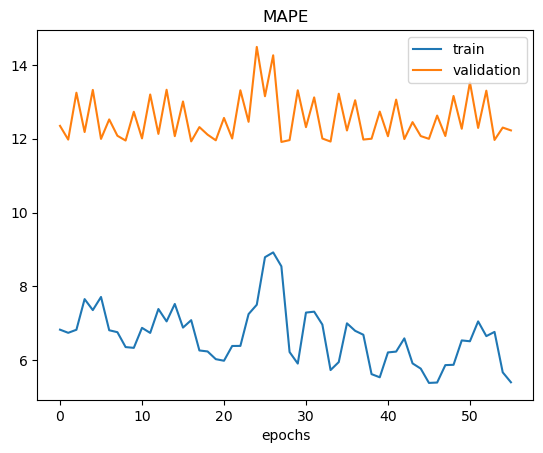

In [ ]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='validation')

plt.title('MAPE')
plt.xlabel('epochs')
plt.legend(loc='upper right')

###     帶入全部數據重新訓練

In [ ]:
X_tr = np.array(X_org)
Y_tr = np.array(Y_org)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_tr)
X_tr = sc.transform(X_tr)

batch_size = X_tr.shape[0]
num_epochs = 500
model_name = 'Best-MLP-model_{}.h5'.format(datetime.now()
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + model_name),
                        monitor='mean_absolute_percentage_error',
                        save_best_only=True,
                        mode='min')
# 训练模型
start = datetime.now()
history = mlp.fit(X_tr, Y_tr,
          epochs=num_epochs, batch_size=batch_size,
          # validation_data=(X_val, Y_val),
          callbacks=[model_cbk, model_mckp, es])

end = datetime.now()

print("Time cost = ",end-start,'\n')
print(model_name)


Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.0886 - mean_absolute_percentage_error: 7.4870
Epoch 2/500
1/1 [==============================] - 0s 39ms/step - loss: 0.0719 - mean_absolute_percentage_error: 7.8114
Epoch 3/500
1/1 [==============================] - 0s 37ms/step - loss: 0.0678 - mean_absolute_percentage_error: 8.1618
Epoch 4/500
1/1 [==============================] - 0s 37ms/step - loss: 0.0632 - mean_absolute_percentage_error: 8.1571
Epoch 5/500
1/1 [==============================] - 0s 37ms/step - loss: 0.0579 - mean_absolute_percentage_error: 8.0221
Epoch 6/500
1/1 [==============================] - 0s 38ms/step - loss: 0.0527 - mean_absolute_percentage_error: 7.9226
Epoch 7/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0474 - mean_absolute_percentage_error: 7.8078
Epoch 8/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0428 - mean_absolute_percentage_error: 7.6591
Epoch 9/500
1/1 [=========================

##  Model_2

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding,Flatten,InputLayer


input_X = keras.Input(shape = (X_train.shape[1],))

# the first branch operates on the first input
model_dnn = Dense(64, activation='relu')(input_X)
model_dnn = Dense(128, activation='relu')(model_dnn)
model_dnn = Dense(256, activation='relu')(model_dnn)
model_dnn = Dense(512, activation='relu')(model_dnn)
model_dnn = Dropout(0.3)(model_dnn)
model_dnn = Dense(1024, activation='relu')(model_dnn)
# model_dnn = Dropout(0.3)(model_dnn)
model_dnn = Dense(1024, activation='relu')(model_dnn)
model_dnn = Dense(1024, activation='relu')(model_dnn)
# model_dnn = Dropout(0.3)(model_dnn)
model_dnn = Dense(1024, activation='relu')(model_dnn)
model_dnn = Dense(1024, activation='relu')(model_dnn)
model_dnn = Dropout(0.3)(model_dnn)
model_dnn = Dense(1024, activation='relu')(model_dnn)
model_dnn = Dense(512, activation='relu')(model_dnn)
# model_dnn = Dropout(0.3)(model_dnn)
model_dnn = Dense(512, activation='relu')(model_dnn)
model_dnn = Dense(512, activation='relu')(model_dnn)
# model_dnn = Dropout(0.3)(model_dnn)
model_dnn = Dense(512, activation='relu')(model_dnn)
model_dnn = Dense(256, activation='relu')(model_dnn)
model_dnn = Dropout(0.3)(model_dnn)
model_dnn = Dense(64, activation='relu')(model_dnn)
model_dnn = Dense(1, activation='linear')(model_dnn)
model_dnn = keras.Model(inputs = input_X , outputs = model_dnn , name = 'SimpleDNN')


max_features = X_train_vec.shape[1]  # 要考慮作為特徵的語詞數量
maxlen = X_train_vec.shape[1]  # why 256?? 當句子的長度超過256個語詞的部份,就把它刪除掉
batch_size = X_train_vec.shape[0]
ebd_features = 300 # hyperparameter

input_X_vec = keras.Input(shape = (X_train_vec.shape[1],))

# model_vec = Sequential(name='vector_embeddind')   # 輸入 （sample size，time steps） with label encoding
model_vec = Embedding(max_features, ebd_features, input_length=maxlen)(input_X_vec)
model_vec = Dropout(0.3)(model_vec)
model_vec = LSTM(128, return_sequences=True)(model_vec)
model_vec = Dropout(0.3)(model_vec)
model_vec = LSTM(64, return_sequences=True)(model_vec)
model_vec = Dropout(0.3)(model_vec)
model_vec = LSTM(32, return_sequences=True)(model_vec)
model_vec = Dropout(0.3)(model_vec)
model_vec = LSTM(16, return_sequences=True)(model_vec)
model_vec = Dropout(0.3)(model_vec)
model_vec = LSTM(4)(model_vec)
model_vec = Dense(1, activation='linear')(model_vec)
model_vec = keras.Model(inputs = input_X_vec , outputs = model_vec , name = 'VectorEmbeddind')


# combine the output of the two branches

combined = layers.concatenate([model_dnn.output, model_vec.output])

model_combined = Dense(2, activation='relu')(combined)
model_combined = Dense(1, activation='linear')(model_combined)

model = keras.Model(inputs = [model_dnn.input,model_vec.input] , outputs = model_combined , name = 'MultinputModel')

model.compile(optimizer=Adam(learning_rate=0.001),  # 选择优化器
            loss='mse',
            metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

model.summary()

Model: "MultinputModel"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 41)]                 0         []                            
                                                                                                  
 dense_107 (Dense)           (None, 64)                   2688      ['input_21[0][0]']            
                                                                                                  
 dense_108 (Dense)           (None, 128)                  8320      ['dense_107[0][0]']           
                                                                                                  
 dense_109 (Dense)           (None, 256)                  33024     ['dense_108[0][0]']           
                                                                                     

In [ ]:
tag = str(datetime.now().month) + '-' +str(datetime.now().day)+ '_' +str(datetime.now().hour)+ '-' +str(datetime.now().minute)
# for colab
model_dir = '/content/drive/MyDrive/Colab Notebooks/永豐/Model/'
log_dir = '/content/drive/MyDrive/Colab Notebooks/永豐/Model/logs/'
# # for local
# model_dir = 'D:/Desktop/python/永豐-攻房戰/Code/Model/DL/'
# log_dir = 'D:/Desktop/python/永豐-攻房戰/Code/Model/DL/logs/'

model_name = 'MLP-model_{}.h5'.format(tag)



model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckpoint回調函數幫忙儲存網路模型，可以設定只儲存最好的模型，「monitor」表示被監測的數據，「mode」min則代表監測數據越小越好。
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + model_name,
                                        monitor='mean_absolute_percentage_error',
                                        save_best_only=True,
                                        mode='min')
es = keras.callbacks.EarlyStopping(monitor='val_mean_absolute_percentage_error', mode='min', patience=10)

In [ ]:
batch_size = 500
num_epochs = 500

# 训练模型
start = datetime.now()
history = model.fit(x=[X_train,X_train_vec], y=Y_train,
          epochs=num_epochs, batch_size=batch_size,
          validation_split = 0.2,
          callbacks=[model_cbk, model_mckp, es])

# 评估模型
test_loss, test_mape = model.evaluate([X_test,X_test_vec], Y_test)
end = datetime.now()
print(f"Test MAPE: {test_mape}")
print("Time cost = ",end-start)

Epoch 1/500
16/16 [==============================] - 24s 579ms/step - loss: 2.1170 - mean_absolute_percentage_error: 56.3518 - val_loss: 1.6442 - val_mean_absolute_percentage_error: 47.7890
Epoch 2/500
16/16 [==============================] - 7s 427ms/step - loss: 0.6789 - mean_absolute_percentage_error: 29.3113 - val_loss: 0.2772 - val_mean_absolute_percentage_error: 18.0049
Epoch 3/500
16/16 [==============================] - 7s 450ms/step - loss: 0.2867 - mean_absolute_percentage_error: 19.5124 - val_loss: 0.1724 - val_mean_absolute_percentage_error: 15.6228
Epoch 4/500
16/16 [==============================] - 7s 446ms/step - loss: 0.2577 - mean_absolute_percentage_error: 17.9832 - val_loss: 0.2685 - val_mean_absolute_percentage_error: 16.0943
Epoch 5/500
16/16 [==============================] - 7s 448ms/step - loss: 0.2275 - mean_absolute_percentage_error: 16.9788 - val_loss: 0.3626 - val_mean_absolute_percentage_error: 18.6954
Epoch 6/500
16/16 [==============================] - 7

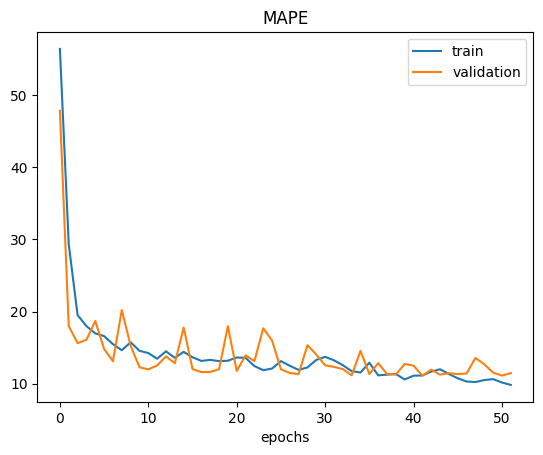

In [ ]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='validation')

plt.title('MAPE')
plt.xlabel('epochs')
plt.legend(loc='upper right')

###     帶入全部數據重新訓練

In [ ]:
X_tr = np.array(X_org)
X_vec = np.array(X_vec)
Y_tr = np.array(Y_org)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_tr)
X_tr = sc.transform(X_tr)


tag = str(datetime.now().month) + ' ' +str(datetime.now().day)+ ' ' +str(datetime.now().hour)+ ' ' +str(datetime.now().minute)
model_name = 'Best-MLP-model_{}.h5'.format(tag)
model_mckp = keras.callbacks.ModelCheckpoint((model_dir + model_name),
                        monitor='mean_absolute_percentage_error',
                        save_best_only=True,
                        mode='min')
# 训练模型
start = datetime.now()
history = model.fit([X_tr,X_vec], Y_tr,
          epochs=num_epochs, batch_size=batch_size,
          validation_split = 0.2,
          callbacks=[model_cbk, model_mckp, es])

end = datetime.now()

print("Time cost = ",end-start,'\n')
print(model_name)


Epoch 1/500
19/19 [==============================] - ETA: 0s - loss: 0.1161 - mean_absolute_percentage_error: 12.1764

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 3s 144ms/step - loss: 0.1161 - mean_absolute_percentage_error: 12.1764 - val_loss: 0.1386 - val_mean_absolute_percentage_error: 11.3883
Epoch 2/500
19/19 [==============================] - 2s 127ms/step - loss: 0.0886 - mean_absolute_percentage_error: 10.5076 - val_loss: 0.0866 - val_mean_absolute_percentage_error: 10.4996
Epoch 3/500
19/19 [==============================] - 2s 133ms/step - loss: 0.0823 - mean_absolute_percentage_error: 10.3281 - val_loss: 0.0790 - val_mean_absolute_percentage_error: 9.9748
Epoch 4/500
19/19 [==============================] - 3s 174ms/step - loss: 0.0771 - mean_absolute_percentage_error: 10.1258 - val_loss: 0.0749 - val_mean_absolute_percentage_error: 9.9365
Epoch 5/500
19/19 [==============================] - 2s 115ms/step - loss: 0.0754 - mean_absolute_percentage_error: 10.1504 - val_loss: 0.0847 - val_mean_absolute_percentage_error: 10.2912
Epoch 6/500
19/19 [==============================] - 2s 121ms/step - 

# Predict

In [ ]:
pb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/永豐/public_data_eng_詞向量.csv')

pb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Columns: 810 entries, ID to vector_768
dtypes: float64(786), int64(23), object(1)
memory usage: 36.3+ MB


In [ ]:
order = ['land_square', 'floor', 'total_floor', 'building_age',
       'building_square', 'parking_square', 'twd97_x', 'twd97_y',
       'main_square', 'balcony_square', 'attached_square', 'county2',
       'county_district2', 'usage_type2', 'main_use2', 'main_materials2',
       'building_type2', 'house_price_index',
       'presale_unit_price', 'second_unit_price', 'presale_minus_existing',
       'second_inventory', 'income_median', 'income_avg', 'income_cv',
       'salary_to_income', 'dividend_to_income', 'road2', 'ATM_in_1000',
       'Bank_in_1000', 'Bike_in_1000', 'Bus_in_1000', 'Con_in_1000',
       'ES_in_1000', 'Hos_in_1000', 'JHS_in_1000', 'MRT_in_1000',
       'Post_in_1000', 'SHS_in_1000', 'Train_in_1000', 'Uni_in_1000']

In [ ]:
# 將輸入數據存成Numpy 格式
X_test = pb_df.iloc[:,1:42]
X_test = X_test[order]
X_test_vec = pb_df.iloc[:,43:]

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   land_square             5876 non-null   float64
 1   floor                   5876 non-null   int64  
 2   total_floor             5876 non-null   int64  
 3   building_age            5876 non-null   float64
 4   building_square         5876 non-null   float64
 5   parking_square          5876 non-null   float64
 6   twd97_x                 5876 non-null   int64  
 7   twd97_y                 5876 non-null   int64  
 8   main_square             5876 non-null   float64
 9   balcony_square          5876 non-null   float64
 10  attached_square         5876 non-null   float64
 11  county2                 5876 non-null   float64
 12  county_district2        5876 non-null   float64
 13  usage_type2             5876 non-null   int64  
 14  main_use2               5876 non-null   

In [ ]:
X_test = np.array(X_test)
X_test_vec = np.array(X_test_vec)

sc = StandardScaler()
sc.fit(X_test)

X_test = sc.transform(X_test)

In [ ]:
# 載入模型
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/永豐/Model/Best-MLP-model_9 30 4 11.h5')

# 預測測試數據
y_pred = model.predict([X_test,X_test_vec])
print(y_pred.shape)

184/184 [==============================] - 4s 17ms/step
(5876, 1)


In [ ]:
tag = str(datetime.now().month) + ' ' +str(datetime.now().day)+ ' ' +str(datetime.now().hour)+ ' ' +str(datetime.now().minute)
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/永豐/public_submission_template.csv')
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5876 non-null   object 
 1   predicted_price  5876 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.9+ KB


In [ ]:
submit['predicted_price'] = y_pred


submit.to_csv('/content/drive/MyDrive/Colab Notebooks/永豐/public_submission_{}.csv'.format(tag),index = False)